In [715]:
print("Analyse Bourse")


Analyse Bourse


# Let's go learning PYTHON !

In [716]:
# Ceci est un commentaire dans la cellule de code 
# Python est de la programmation OBJET. On définit des variables. 
name = "Corentin"

print(name)


Corentin


In [717]:
name
# si on appelle la variable alors on voit son type.

'Corentin'

In [718]:
# Pour les chiffres on a 
# LES ENTIERS NATURELS
age = 24
print(age)

24


In [719]:
# Pour les chiffres à virgule on parle de FLOATS
pi = 3.14159
pi

3.14159

In [720]:
name = 'Imen'
#Titouan c'est du texte == STRING

In [721]:
# Mais nous sommes humains, donc nous LISONS des PHRASES
# Dès lors, on utilise la fonction PRINT F, qui permet d'avoir un print plus proche de notre language
# Les variables y sont DYNAMIQUES

print(f'Hello, les boloss dont {name}')

Hello, les boloss dont Imen


In [722]:
is_cool = True
is_cool

True

# Présentation des DATA STRUCTURES


In [723]:
# Les LISTES se nomment list en anglais 
stocks = ["AAPL","GOOGL","MSFT","TSLA"]
stocks


['AAPL', 'GOOGL', 'MSFT', 'TSLA']

In [724]:
# On peut AJOUTER des inputs dans la liste via la fonction APPEND
stocks.append("AMZN")
stocks

['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

In [725]:
# UN DICTIONNAIRE c'est mieux encore qu'une liste
# On parle de Clé-Valeur
prices = {
    "APPL":248.04,
    "GOOGLE":328.33,
    "TSLA":437.43
}
prices

{'APPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# La clé du succès

In [726]:
# C'est le fait que python repose sur des PACKAGES
# Donc on gagne un temps fou à ne pas ré inventer la ROUE à chaque fois
#! pip install yfinance

In [727]:
! pip install yfinance


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [728]:
import yfinance as yf

In [729]:
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [730]:
# La structure d'un projet python 
# Une structure où on emporte tous les packages
# Comme ça on a une overview des dépendances 

In [731]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [732]:
ticker = "AAPL"

In [733]:
# Pour prendre les données du packages yfinance on utilise
# Une FONCTION qui est def dans ce package pour EXTRAIRE la donnée
data = yf.download(ticker, start="2020-01-01",progress=False)

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


In [734]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400528,72.460791,71.156689,71.409793,135480400
2020-01-03,71.696640,72.455958,71.472462,71.629145,146322800
2020-01-06,72.267937,72.306506,70.568510,70.819208,118387200
2020-01-07,71.928040,72.533080,71.708680,72.277563,108872000
2020-01-08,73.085098,73.386416,71.631544,71.631544,132079200
...,...,...,...,...,...
2026-02-11,275.500000,280.179993,274.450012,274.700012,51931300
2026-02-12,261.730011,275.720001,260.179993,275.589996,81077200


In [735]:
data.head() # fonction pour voir les 5 premières lignes du dataset
data.tail() # fonction pour voir les 5 dernières lignes du dataset

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-02-11,275.500000,280.179993,274.450012,274.700012,51931300
2026-02-12,261.730011,275.720001,260.179993,275.589996,81077200
2026-02-13,255.779999,262.230011,255.449997,262.010010,56290700
2026-02-17,263.880005,266.290009,255.539993,258.049988,58469100
2026-02-18,264.350006,266.820007,262.450012,263.600006,34129600


In [736]:
#packages intéressant : yfinance; pypfopt ; empyrical ; risk-kit

In [737]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [738]:
#1. Télécharger les données (depuis 2020)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", auto_adjust=False)

#2 Calculer les rendements journaliers (Daily returns)
# On utilise le "Adj Close" (prix ajusté aux dividendes/splits)
data ['Returns']= data['Adj Close'].pct_change()

#3. Calculer la volatilité et le rendement moyen (Annualisés)
# Il y a environ 252 jours de trading par an 
mean_return_daily = data['Returns'].mean()
volatility_daily = data ['Returns'].std()
annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily*np.sqrt(252)

#4. Calcul du ratio de Sharpe (supposons un taux sans risque de 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"---Analyse pour {ticker}---")
print(f"Rendement annualisé: {annualized_return:.2%}")
print(f"volatilité annualisée: {annualized_volatility:.2%}")
print(f"Ratio de Sharpe:{sharpe_ratio:2f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

---Analyse pour AAPL---
Rendement annualisé: 26.23%
volatilité annualisée: 31.73%
Ratio de Sharpe:0.826637


Text(0.5, 0, 'Date')

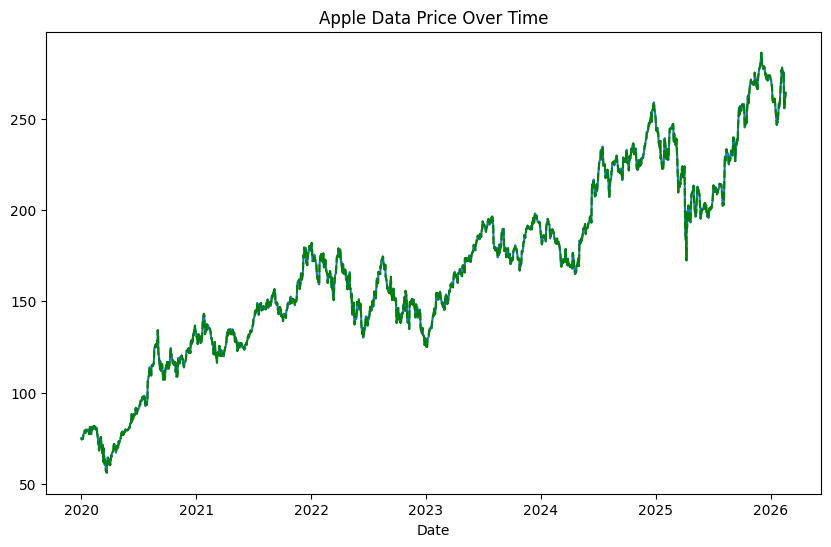

In [739]:
plt.figure (figsize=(10,6))
plt.plot (data['Close'], label='AAPL Closing Price')
plt.title ('Apple Data Price Over Time')
plt.plot(data['Close'],'g--')
plt.xlabel ('Date')

In [740]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [741]:
# Téléchargement des données 2015-2025

tickers = ["MC.PA", "^FCHI"]

data = yf.download(tickers, start="2015-01-01")
data = data["Close"].dropna()

returns = data.pct_change().dropna()

returns.columns = ["LVMH", "CAC 40"]

returns

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


[*********************100%***********************]  2 of 2 completed


,LVMH,CAC 40
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015041,-0.019041
...,...,...
2026-02-13,-0.019638,-0.003455
2026-02-16,0.007974,0.000573
2026-02-17,0.018136,0.005406


In [742]:
# Calcul des rendements journaliers

returns = data.pct_change().dropna()

returns.head()

Ticker,MC.PA,^FCHI
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015041,-0.019041


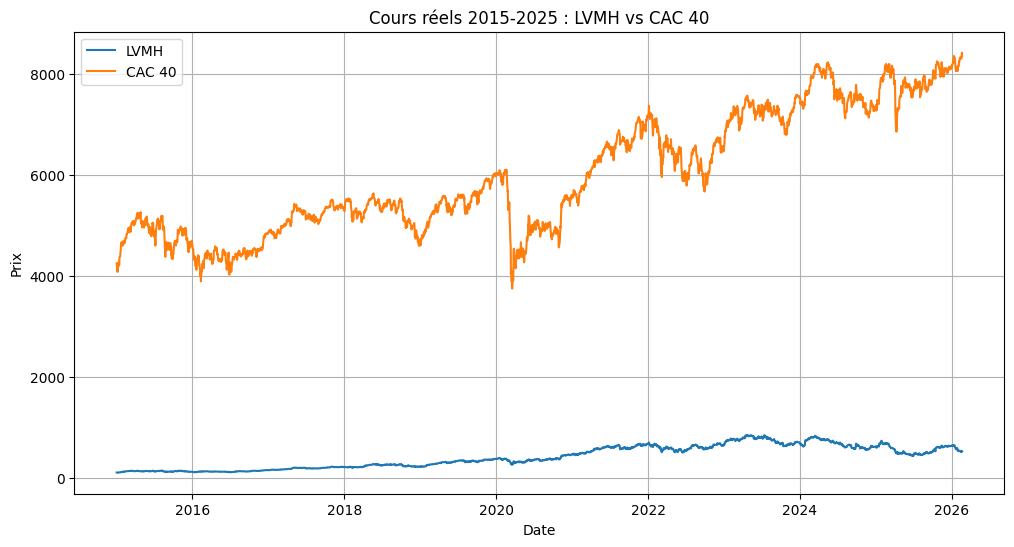

In [ ]:
# Cours LVMH & CAC40
plt.figure(figsize=(12,6))

plt.plot(data.index, data['MC.PA'], label='LVMH')
plt.plot(data.index, data['^FCHI'], label='CAC 40')

plt.title("Cours réels 2015-2025 : LVMH vs CAC 40")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

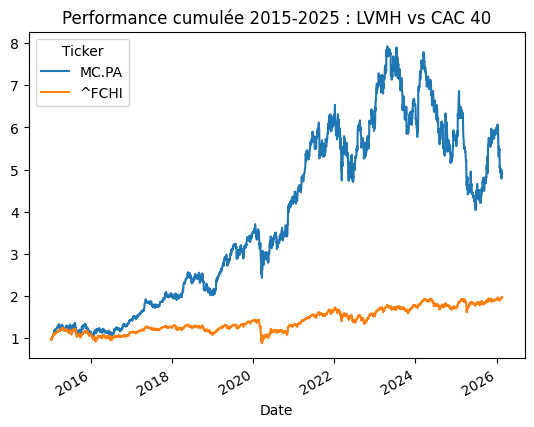

In [744]:
# Performance Cumulée 
cumulative = (1 + returns).cumprod()

plt.figure(figsize=(10,6))
cumulative.plot()
plt.title("Performance cumulée 2015-2025 : LVMH vs CAC 40")
plt.show()

In [745]:
# Rendements annualisés
annual_return = returns.mean() * 252

annual_return_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100
})
print("Tableau comparatif du rendement annualisé :")
annual_return_table.index = ["LVMH", "CAC 40"]
annual_return_table.round(2)


Tableau comparatif du rendement annualisé :


,Rendement annualisé (%)
LVMH,18.04
CAC 40,7.69


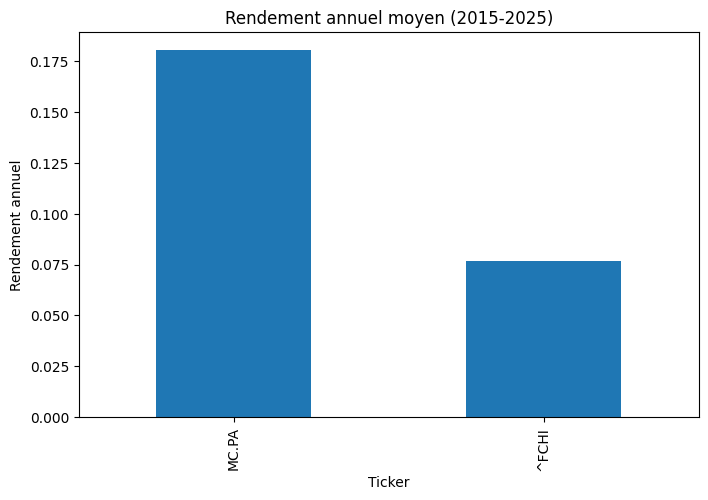

In [746]:
import matplotlib.pyplot as plt

mean_returns = returns.mean() * 252  # annualisé

plt.figure(figsize=(8,5))
mean_returns.plot(kind='bar')
plt.title("Rendement annuel moyen (2015-2025)")
plt.ylabel("Rendement annuel")
plt.show()

In [747]:
# Volatilité annualisé

volatility = returns.std() * np.sqrt(252)

volatility_table = pd.DataFrame({
    "Volatilité annualisée (%)": volatility * 100
})
print("Tableau comparatif de la volatilité annualisé :")
volatility_table.index = ["LVMH", "CAC 40"]
volatility_table.round(2)

Tableau comparatif de la volatilité annualisé :


,Volatilité annualisée (%)
LVMH,28.23
CAC 40,18.38


In [748]:
# Ratio de Sharpe

risk_free_rate = 0.02

sharpe = (annual_return - risk_free_rate) / volatility

sharpe_table = pd.DataFrame({
    "Ratio de Sharpe": sharpe
})

sharpe_table.index = ["LVMH", "CAC 40"]
sharpe_table.round(2)

,Ratio de Sharpe
LVMH,0.57
CAC 40,0.31


In [749]:
# Max Drawdown
def max_drawdown(r):
    cumulative = (1 + r).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_dd = returns.apply(max_drawdown)

drawdown_table = pd.DataFrame({
    "Max Drawdown (%)": max_dd * 100
})

drawdown_table.index = ["LVMH", "CAC 40"]
drawdown_table.round(2)

,Max Drawdown (%)
LVMH,-49.03
CAC 40,-38.56


In [750]:
# Tableau comparatif global

summary_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100,
    "Volatilité annualisée (%)": volatility * 100,
    "Ratio de Sharpe": sharpe,
    "Max Drawdown (%)": max_dd * 100
})
print("Tableau comparatif global :")
summary_table.index = ["LVMH", "CAC 40"]
summary_table.round(2)

Tableau comparatif global :


,Rendement annualisé (%),Volatilité annualisée (%),Ratio de Sharpe,Max Drawdown (%)
LVMH,18.04,28.23,0.57,-49.03
CAC 40,7.69,18.38,0.31,-38.56
